In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Chargement des datasets

In [5]:
X_test = pd.read_csv("X_test_update.csv", index_col=0)
X_train = pd.read_csv("X_train_update.csv", index_col = 0)

In [6]:
X_train.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


Il y a énormément de valuers manquantes pour la variable description.

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13812 entries, 84916 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 539.5+ KB


In [9]:
y_train = pd.read_csv("Y_train_CVw08PX.csv", index_col=0)

In [10]:
y_train.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [12]:
print(len(y_train.value_counts()))

27


Il y a 27 Product type codes différents à prédire.

In [ ]:
# prompt: déplacerle fichier images.zip dans le dossier /content

import shutil

# Source path of the zip file in Google Drive
source_path = "/content/drive/MyDrive/Alternance_Datascientest/Projet_DS/images.zip"  # Replace with the actual path

# Destination path in /content
destination_path = "/content/images.zip"


# Check if the source file exists
if os.path.exists(source_path):
    try:
        shutil.copy2(source_path, destination_path)  # copy2 preserves metadata
        print(f"File '{source_path}' successfully copied to '{destination_path}'")
    except shutil.SameFileError:
        print(f"Source and destination represent the same file.")
    except PermissionError:
        print(f"Permission denied when trying to copy '{source_path}'.")
    except Exception as e:  # Handle other potential errors
        print(f"An error occurred during file copy: {e}")
else:
    print(f"Source file '{source_path}' not found.")

File '/content/drive/MyDrive/Alternance_Datascientest/Projet_DS/images.zip' successfully copied to '/content/images.zip'


In [ ]:
os.chdir("/content")

In [ ]:
# prompt: unzip le fichier /content/images.zip

!unzip /content/images.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: images/image_train/image_1008043271_product_435884222.jpg  
  inflating: images/image_train/image_1225410289_product_3589914271.jpg  
  inflating: images/image_train/image_1053579537_product_1035082409.jpg  
  inflating: images/image_train/image_1242287495_product_3762765648.jpg  
  inflating: images/image_train/image_1178349954_product_2984786216.jpg  
  inflating: images/image_train/image_1130173726_product_2175711747.jpg  
  inflating: images/image_train/image_1249823441_product_3823564721.jpg  
  inflating: images/image_train/image_975388513_product_273380383.jpg  
  inflating: images/image_train/image_1122891664_product_2048952169.jpg  
  inflating: images/image_train/image_1105815462_product_289189072.jpg  
  inflating: images/image_train/image_1190252159_product_2647272609.jpg  
  inflating: images/image_train/image_1295135914_product_4125159586.jpg  
  inflating: images/image_train/image_

Les images sont toutes de tailles (500,500,3)

### Exploration des images

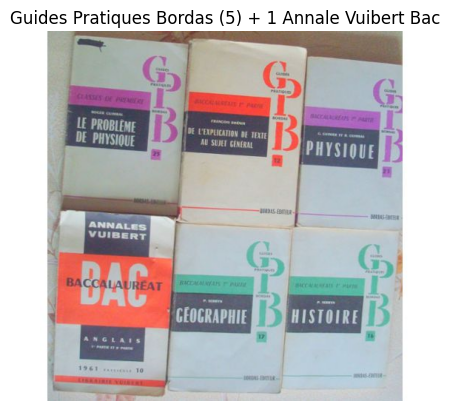

prdtypecode:  2403


In [ ]:
# Relancez la cellule pour afficher une image différente
row = np.random.randint(len(X_train))
plt.imshow(plt.imread(f"images/image_train/image_{X_train.iloc[row]['imageid']}_product_{X_train.iloc[row]['productid']}.jpg", format="jpg"))
plt.title(f"{X_train.iloc[row]['designation']}")
plt.axis("off")
plt.show()
print("prdtypecode: ",y_train.prdtypecode[row])

In [ ]:
img = plt.imread(f"images/image_train/image_{X_train.iloc[row]['imageid']}_product_{X_train.iloc[row]['productid']}.jpg")
img.reshape(1,-1).shape

(1, 750000)

In [ ]:
imgs: np.ndarray
imgs = None
for img_path in os.listdir("images/image_train"):
    img = plt.imread(fname=f"images/image_train/{img_path}", format="jpg")
    img_flat = img.reshape(1,-1)
    if imgs is None:
        imgs = img_flat
    else:
        imgs = np.concatenate((imgs, img_flat), axis=0)
print(imgs.shape)

KeyboardInterrupt: 

### Visualisation et exploration des données textuelles

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def generate_wordcloud(X_train, y_train, category):
    """
    Generates a word cloud from the 'description' column of X_train,
    filtered by a specific category in the 'prdtypecode' column of y_train.

    Args:
        X_train (pd.DataFrame): DataFrame containing the 'description' column.
        y_train (pd.DataFrame): DataFrame containing the 'prdtypecode' column.
        category (str): The product type code to filter by.
    """
    # Merge X_train and y_train based on the common index
    merged_df = pd.merge(X_train, y_train, left_index=True, right_index=True)

    # Remove rows with missing descriptions
    merged_df = merged_df.dropna(subset=['description'])

    # Filter by category
    category_df = merged_df[merged_df['prdtypecode'] == category]

    if category_df.empty:
        print(f"No descriptions found for category '{category}'.")
        return

    # Combine all descriptions into a single string
    text = " ".join(category_df['description'].astype(str))

    # Preprocess the text
    stop_words = set(stopwords.words('french')) # Assuming French text
    lemmatizer = WordNetLemmatizer()

    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    processed_text = " ".join(words)

    # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


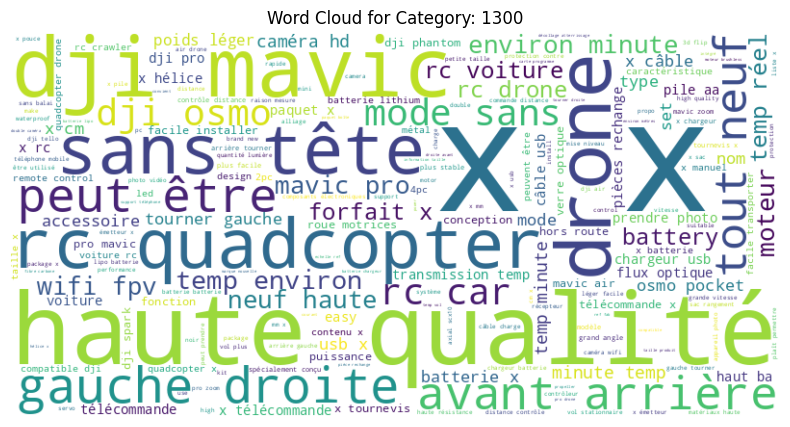

In [36]:
generate_wordcloud(X_train,y_train,1300)

In [27]:
print(y_train.prdtypecode.unique())

[  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301]
